In [2]:
!pip install pandas numpy

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [3]:
# Library Imports

import numpy as np
import pandas as pd

In [4]:
titanic = pd.read_csv('data/titanic/train.csv') # load data
# make a copy of titanic dataset
data1 = titanic.copy()
data1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Complete Case Analysis for Missing Data Imputation

If we remove all the missing observations, we would end up with a very small dataset, given that the Cabin is missing for 77% of the observations.



In [6]:
# check how many observations we would drop
print('total passengers with values in all variables: ', data1.dropna().shape[0])
print('total passengers in the Titanic: ', data1.shape[0])
print('percentage of data without missing values: ', data1.dropna().shape[0]/ float(data1.shape[0]))

total passengers with values in all variables:  183
total passengers in the Titanic:  891
percentage of data without missing values:  0.2053872053872054


So, we have complete information for only 20% of our observations in the Titanic dataset. Thus, Complete Case Analysis method would not be an option for this dataset.

## Mean/ Median/ Mode for Missing Data Imputation

In [7]:
X_train=data1
X_test=pd.read_csv('data/titanic/test.csv') # load test data

In [8]:
# impute missing values in age in train and test set
median = X_train.Age.median()
for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)
X_train['Age'].isnull().sum()

C:\Users\kshantam\AppData\Local\Temp\ipykernel_17948\4294016374.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median, inplace=True)


0

0 represents that now the Age feature has no null values.

One important point to consider while doing imputation is that it should be done over the training set first and then to the test set. All missing values in the train set and test set should be filled with the value which is extracted from the train set only. This helps in avoiding overfitting.

## Missing Value Indicator For Missing Value Indication

In [9]:
X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
X_train.Age.mean(), X_train.Age.median()

(29.36158249158249, 28.0)

In [11]:
# Now, since mean and median are the same, let’s replace them with the median.

X_train['Age'].fillna(X_train.Age.median(), inplace=True)
X_test['Age'].fillna(X_train.Age.median(), inplace=True)

X_train.head(10)

C:\Users\kshantam\AppData\Local\Temp\ipykernel_17948\2833255607.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train.Age.median(), inplace=True)
C:\Users\kshantam\AppData\Local\Temp\ipykernel_17948\2833255607.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


So, the Age_NA variable was created to capture the missingness.

## Categorical encoding in Feature Engineering

###  One-Hot Encoding

In [12]:
pd.get_dummies(data1['Sex']).head()
pd.concat([data1['Sex'], pd.get_dummies(data1['Sex'])], axis=1).head()

,Sex,female,male
0,male,False,True
1,female,True,False
2,female,True,False
3,female,True,False
4,male,False,True


But we can see that we only need 1 dummy variable to represent Sex categorical variable. So, we can take it as a general formula where if there are n categories, we only need an n-1 dummy variable. So we can easily drop anyone dummy variable. To get n-1 dummy variables simply use this:

In [14]:
pd.get_dummies(data1['Sex'], drop_first=True).head()

,male
0,True
1,False
2,False
3,False
4,True


### Ordinal Encoding

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [17]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

### Target / Mean Encoding

In [18]:
import pandas as pd
# creating dataset
data={'CarName':['C1','C2','C3','C1','C4','C3','C2','C1','C2','C4','C1'],
      'Target':[1,0,1,1,1,0,0,1,1,1,0]}
df = pd.DataFrame(data)
print(df)

   CarName  Target
0       C1       1
1       C2       0
2       C3       1
3       C1       1
4       C4       1
5       C3       0
6       C2       0
7       C1       1
8       C2       1
9       C4       1
10      C1       0


In [20]:
df.groupby(['CarName'])['Target'].count()

CarName
C1    4
C2    3
C3    2
C4    2
Name: Target, dtype: int64

In [21]:
Mean_encoded = df.groupby(['CarName'])['Target'].mean().to_dict()
df['CarName'] = df['CarName'].map(Mean_encoded)
print(df)

     CarName  Target
0   0.750000       1
1   0.333333       0
2   0.500000       1
3   0.750000       1
4   1.000000       1
5   0.500000       0
6   0.333333       0
7   0.750000       1
8   0.333333       1
9   1.000000       1
10  0.750000       0


## Variable Transformation

In [22]:
cols_reqiuired = ['Age', 'Fare', 'Survived']
data1[cols_reqiuired].head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [24]:
# First, we need to fill in missing data. We will start with filling missing data with a random sample.

def impute_na(data, variable):
    df = data.copy()
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    return df[variable+'_random']
# fill na
data1['Age'] = impute_na(data1, 'Age')

In [37]:
!pip3 install -U matplotlib


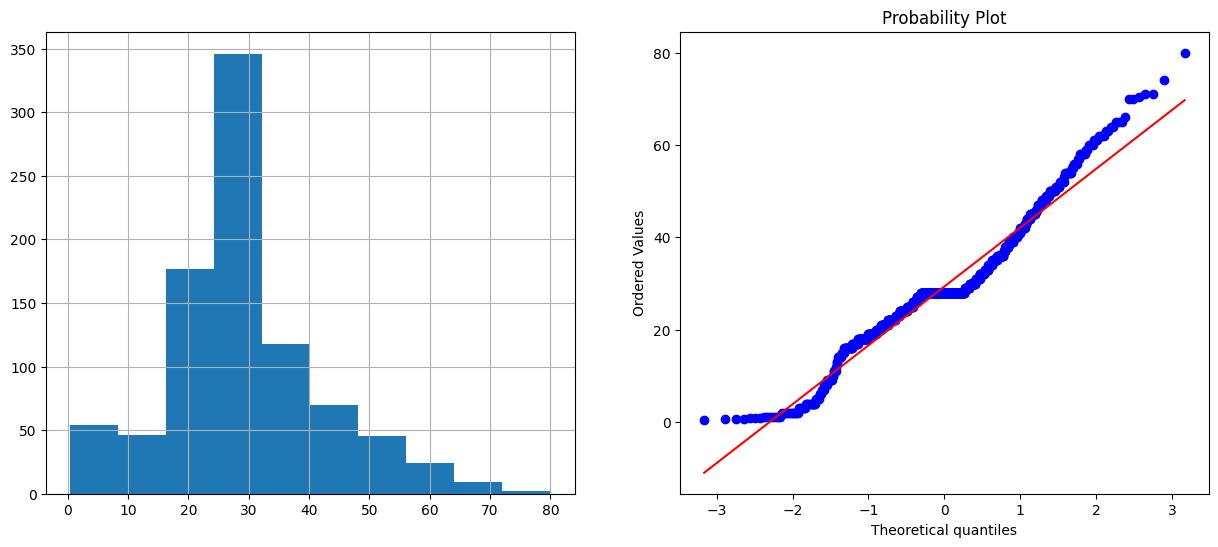

In [40]:
#Now, to visualize the distribution of the age variable we will plot histogram and Q-Q-plot.
import matplotlib.pyplot as plt
from scipy import stats
import pylab
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.show()
plots(data1, 'Age')

### Logarithmic transformation

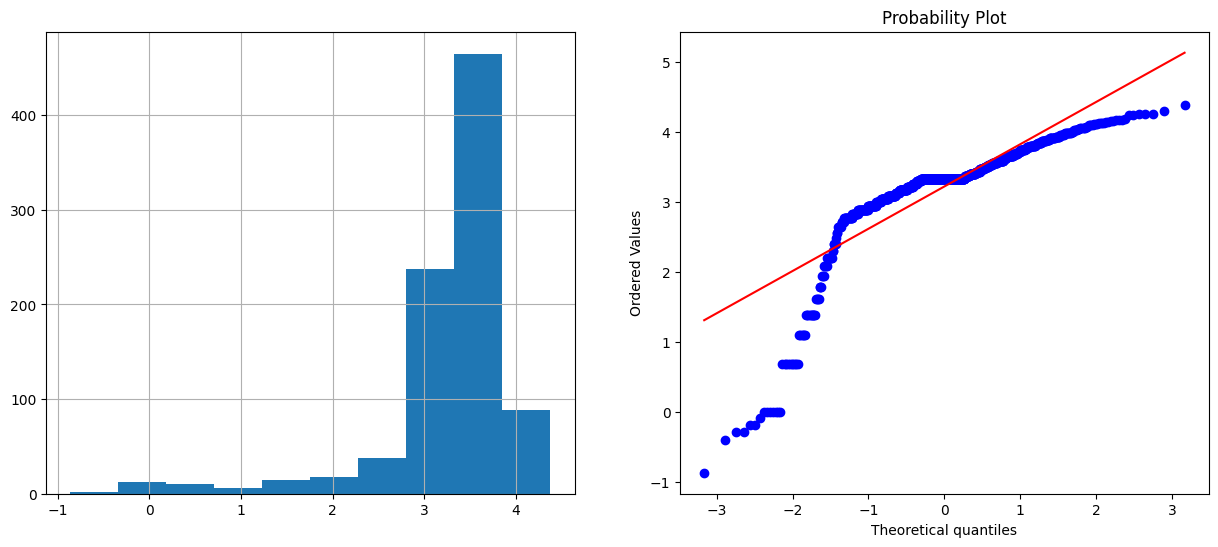

In [42]:
data1['Age_log'] = np.log(data1.Age)
plots(data1, 'Age_log')

### Square root transformation – sqrt(x)

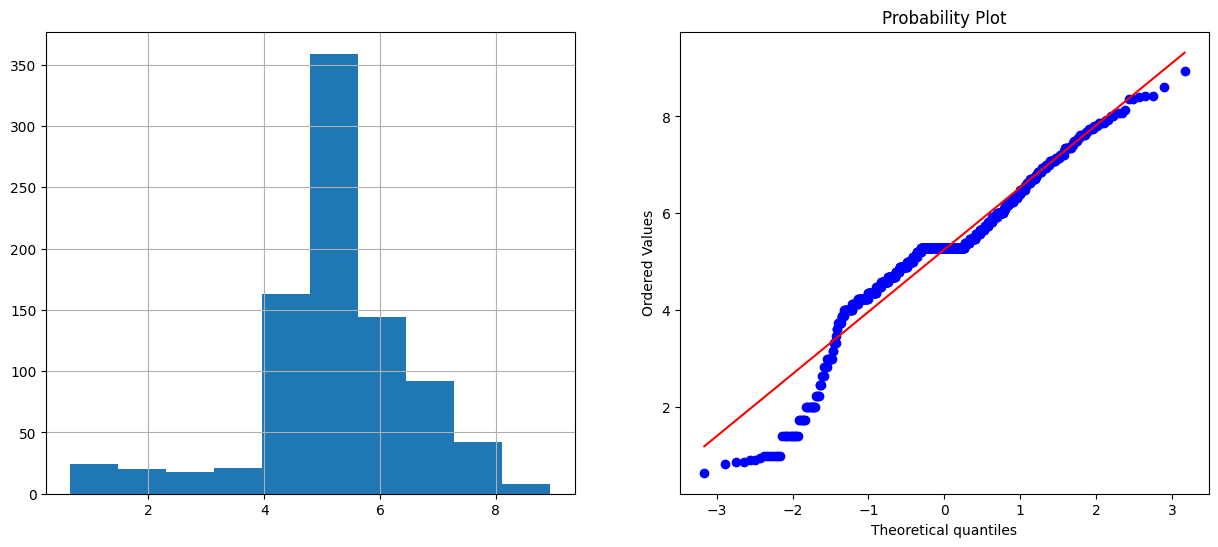

In [43]:
data1['Age_sqr'] =data1.Age**(1/2)
plots(data1, 'Age_sqr')

### Reciprocal transformation – 1 / x

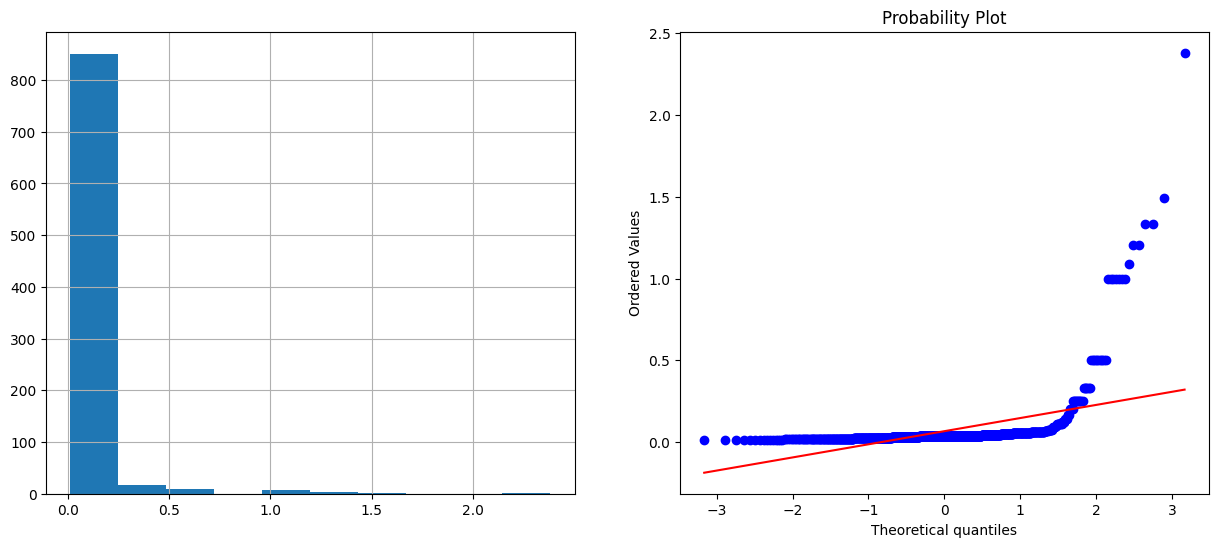

In [44]:
data1['Age_reciprocal'] = 1 / data1.Age
plots(data1, 'Age_reciprocal')

### Exponential transformation – exp(x)

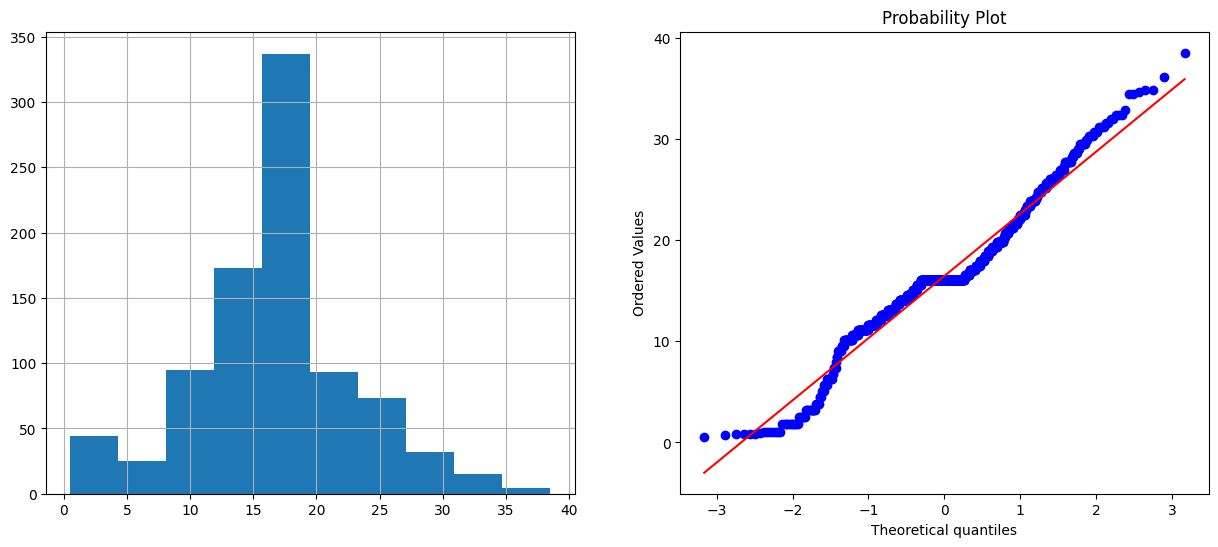

In [45]:
data1['Age_exp'] = data1.Age**(1/1.2) 
plots(data1, 'Age_exp')